In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [9]:

conn = sqlite3.connect('chinook.db')

In [10]:
query = "SELECT FirstName, LastName, Country FROM Customers WHERE Country = 'USA';"
df = pd.read_sql_query(query, conn)
df.dropna(inplace=True)  # Eliminar valores nulos
df

,FirstName,LastName,Country
0,Frank,Harris,USA
1,Jack,Smith,USA
2,Michelle,Brooks,USA
3,Tim,Goyer,USA
4,Dan,Miller,USA
5,Kathy,Chase,USA
6,Heather,Leacock,USA
7,John,Gordon,USA
8,Frank,Ralston,USA
9,Victor,Stevens,USA


In [11]:
import matplotlib.pyplot as plt

Analiza los datos de la tabla invoices para calcular la facturación total (Total) por país. Representa los resultados en un gráfico de barras donde los países estén ordenados de mayor a menor facturación.

   Country  TotalSales
0      USA      523.06
1   Canada      303.96
2   France      195.10
3   Brazil      190.10
4  Germany      156.48


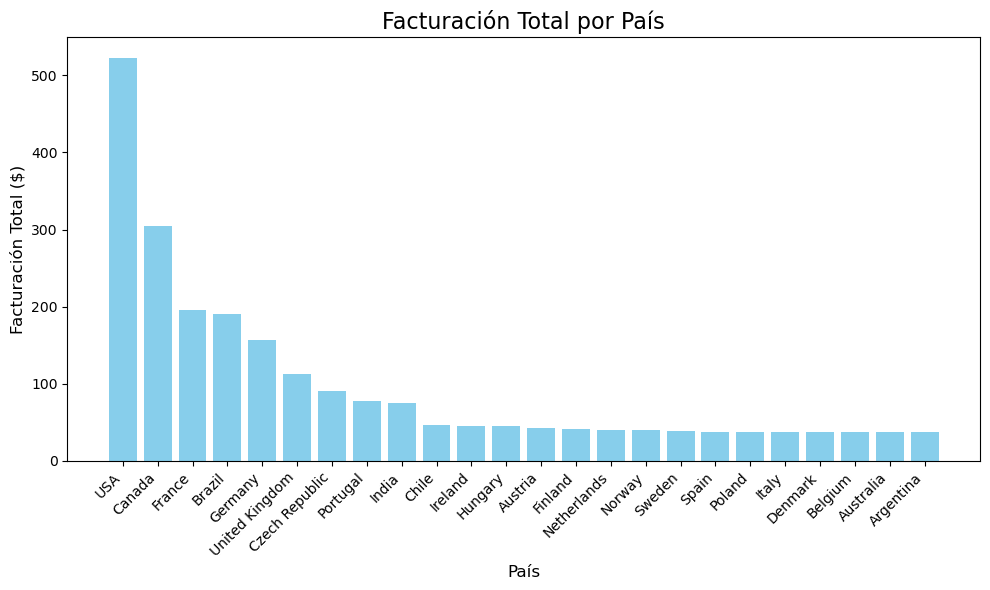

In [12]:
# Query SQL para calcular la facturación total por país
query2 = """
SELECT BillingCountry AS Country, SUM(Total) AS TotalSales
FROM invoices
GROUP BY BillingCountry
ORDER BY TotalSales DESC;
"""

# Cargar los resultados de la consulta en un DataFrame de Pandas
df = pd.read_sql_query(query2, conn)

# Mostrar los primeros registros
print(df.head())

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['TotalSales'], color='skyblue')
plt.title('Facturación Total por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Facturación Total ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Calcula las canciones más vendidas agrupadas por género usando las tablas invoice_items, tracks, y genres. Representa los resultados en un gráfico de barras con los 5 géneros más vendidos.

                Genre  TotalSales
0                Rock         835
1               Latin         386
2               Metal         264
3  Alternative & Punk         244
4                Jazz          80


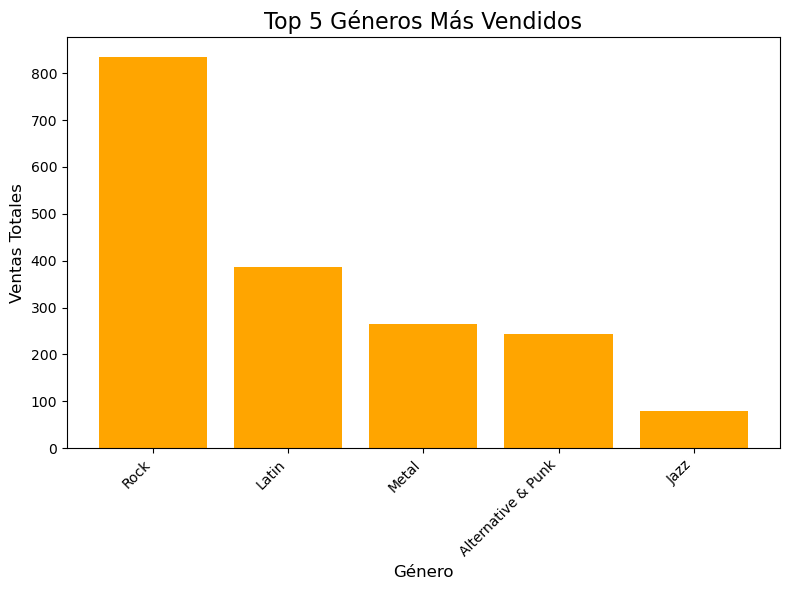

In [13]:
# Query SQL para calcular las canciones más vendidas por género
query3 = """
SELECT g.Name AS Genre, COUNT(ii.InvoiceLineId) AS TotalSales
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId
JOIN invoice_items ii ON t.TrackId = ii.TrackId
GROUP BY g.Name
ORDER BY TotalSales DESC
LIMIT 5;
"""

# Cargar los resultados en un DataFrame
df = pd.read_sql_query(query3, conn)

# Mostrar los primeros registros
print(df)

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df['Genre'], df['TotalSales'], color='orange')
plt.title('Top 5 Géneros Más Vendidos', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Encuentra los 5 artistas con más ventas totales usando las tablas artists, albums, tracks, y invoice_items. Representa los resultados en un gráfico de barras horizontal.

                    Artist  TotalSales
0              Iron Maiden         140
1                       U2         107
2                Metallica          91
3             Led Zeppelin          87
4  Os Paralamas Do Sucesso          45


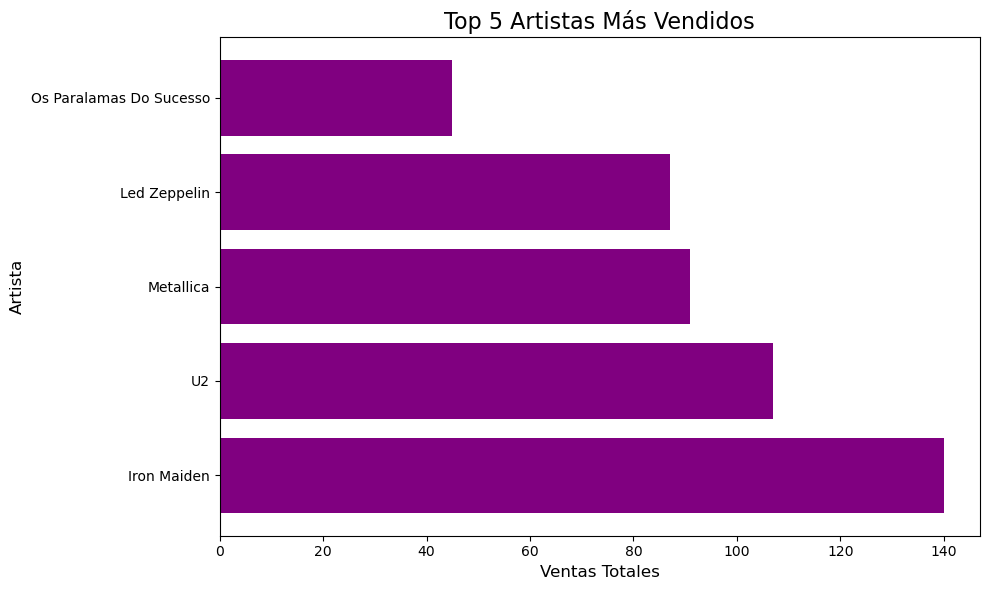

In [14]:
# Query SQL para calcular las ventas totales por artista
query4 = """
SELECT ar.Name AS Artist, COUNT(ii.InvoiceLineId) AS TotalSales
FROM artists ar
JOIN albums al ON ar.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
JOIN invoice_items ii ON t.TrackId = ii.TrackId
GROUP BY ar.Name
ORDER BY TotalSales DESC
LIMIT 5;
"""

# Cargar los resultados en un DataFrame
df = pd.read_sql_query(query4, conn)

# Mostrar los primeros registros
print(df)

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(df['Artist'], df['TotalSales'], color='purple')
plt.title('Top 5 Artistas Más Vendidos', fontsize=16)
plt.xlabel('Ventas Totales', fontsize=12)
plt.ylabel('Artista', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
